# cosmovis preprocessing scripts

## import modules and verify trident

In [1]:
# import modules and verify trident installation
# you may need to pip install a few things
# make sure to have the development versions of yt and trident installed, until at somepoint it merges with the master
# you may need to install an mpi package for your machine to enable parallel computing with yt


import yt
import trident
import eagleSqlTools as sql
import numpy as np
import yt.units as units
from yt.visualization.volume_rendering.api import PointSource
from yt.units import kpc
import pylab
import json
import math
from math import log10, floor
yt.enable_parallelism()
trident.verify()


yt : [INFO     ] 2021-03-01 17:31:52,294 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-03-01 17:31:52,295 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-03-01 17:31:52,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-01 17:31:52,296 Parameters: domain_right_edge         = [3.08567758e+22 3.08567758e+22 3.08567758e+22]
yt : [INFO     ] 2021-03-01 17:31:52,297 Parameters: cosmological_simulation   = 0.0



Creating single-cell dataset
----------------------------


Creating ray object through single-cell dataset
-----------------------------------------------



yt : [INFO     ] 2021-03-01 17:31:52,621 Getting segment at z = 0.0: [0. 0. 0.] unitary to [1. 1. 1.] unitary.
yt : [INFO     ] 2021-03-01 17:31:52,623 Getting subsegment: [unyt_quantity(0., 'unitary'), unyt_quantity(0., 'unitary'), unyt_quantity(0., 'unitary')] to [unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary'), unyt_quantity(1., 'unitary')].
C:\Users\david\Anaconda3\envs\py37\lib\site-packages\unyt\array.py:1779: RuntimeWarning: invalid value encountered in true_divide
  inp0.view(np.ndarray), inp1.view(np.ndarray), out=out_func, **kwargs
yt : [INFO     ] 2021-03-01 17:31:52,726 Saving field data to yt dataset: C:\Users\david\AppData\Local\Temp\tmpcwey5_f1\ray.h5.
yt : [INFO     ] 2021-03-01 17:31:52,778 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-03-01 17:31:52,778 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-03-01 17:31:52,778 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-03-


Create spectrum with Lyman alpha, Mg II, and O VI lines
-------------------------------------------------------



yt : [INFO     ] 2021-03-01 17:31:53,111 Creating H_p0_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-03-01 17:31:53,115 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-03-01 17:31:53,124 Creating O_p5_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-03-01 17:31:53,132 Creating spectrum
yt : [INFO     ] 2021-03-01 17:31:53,227 1 out of 1 line components will be deposited as unresolved lines.
yt : [INFO     ] 2021-03-01 17:31:53,235 Not adding line O VI 1038: insufficient column density
yt : [INFO     ] 2021-03-01 17:31:53,236 Not adding line O VI 1032: insufficient column density
yt : [INFO     ] 2021-03-01 17:31:53,239 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-03-01 17:31:53,239 Writing spectrum to hdf5 file: C:\Users\david\AppData\Local\Temp\tmpcwey5_f1\spec_raw.h5.
yt : [INFO     ] 2021-03-01 17:31:53,253 Writing s

Removing all temporary data files...

Congratulations, you have verified that Trident is installed correctly.
Now let's science!



## load data

In [4]:
# select dataset to load

# fn = 'enzo_cosmology_plus/DD0010/DD0010'
fn = r'C:\Users\david\Desktop\git\CosmoVis\static\data\RefL0012N0188\snapshot_028_z000p000\snap_028_z000p000.0.hdf5'
# fn = 'RefL0012N0188/snapshot_028_z000p000/snap_028_z000p000.0.hdf5'
# fn = 'RefL0025N0376/snapshot_028_z000p000/snap_028_z000p000.0.hdf5'
# fn = 'RefL0100N1504/snapshot_028_z000p000/snap_028_z000p000.0.hdf5'
# fn = 'snap_099.0.hdf5'
ds = yt.load(fn)
ad = ds.all_data()
fl = sorted(ds.field_list)

yt : [INFO     ] 2021-03-01 17:32:22,543 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2021-03-01 17:32:22,543 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-03-01 17:32:22,543 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-01 17:32:22,544 Parameters: domain_right_edge         = [8.47125 8.47125 8.47125]
yt : [INFO     ] 2021-03-01 17:32:22,544 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-01 17:32:22,544 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2021-03-01 17:32:22,545 Parameters: omega_lambda              = 0.693
yt : [INFO     ] 2021-03-01 17:32:22,545 Parameters: omega_matter              = 0.307
yt : [INFO     ] 2021-03-01 17:32:22,545 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-03-01 17:32:22,546 Parameters: hubble_constant           = 0.6777
yt : [INFO     ] 2021-03-01 17:32:22,739 Allocating for 1.329e+07 particle

In [57]:
# print(ds['HubbleParam'], ds['Time'], ds['MassTable'][1], ds['NumPart_Total'][1], ds['PartType0','CGSConversionFactor'])
dd = ds.h.all_data()
dd.quantities

## functions for generating voxelized grids

In [13]:
# functions for exporting data to voxelized grids (see below)
# useful for visualizing gas and dark matter particles

def createGrid(ds,size):
    obj = ds.arbitrary_grid(ds.domain_left_edge, ds.domain_right_edge,
                           dims=[size, size, size])
    return obj

def preprocessAttribute(obj,size,particle_type,attribute):
    try:
        f = obj[particle_type, attribute]
#         print(f.in_units('Msun'))
#         print(f)
        if str(f.units) == 'code_mass':
            attr = np.float32(np.array(f.in_units('Msun')))
            units = 'Msun'
        elif str(f.units) == 'K':
            attr = np.float32(np.array(f))
            units = 'K'
        elif str(f.units) == 'code_mass/code_length**3':
            attr = np.float32(np.array(f.in_cgs()))
            units = f.in_cgs().units
        elif str(f.units) == '(dimensionless)':
            attr = np.float32(np.array(f))
            units = 'dimensionless'
        else:
            attr = np.float32(np.array(f.in_cgs()))
            units = f.in_cgs().units
#         print(attr[0])
        print(attribute,units)
        with open(str(size)+'_'+particle_type+'_'+attribute+'.json', 'w') as file:
            json.dump(attr.tolist(), file)   
#         with open(str(size)+'_'+particle_type+'_'+attribute+'_units.json', 'w') as file:
#             json.dump(units, file)
    except:
        print('error')
            
def preprocessAttributes(ds,size,particle_type):
    for i in range(len(fl)):
        obj = createGrid(ds,size)
        if fl[i][0] == particle_type:
            attribute = fl[i][1]
            preprocessAttribute(obj,size,particle_type,attribute)

# examples:
# size - voxels per edge
# size = 64
# preprocessAttributes(ds,size,'PartType0')            
# size = 128 
# preprocessAttributes(ds,size,'PartType0')            
# size = 256
# preprocessAttributes(ds,size,'PartType0')


# size = 64
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'Temperature')     

# size = 64
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'H_number_density')            

# size = 128
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'H_number_density')

# size = 256
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'H_number_density')
# # ##
#size = 64
#obj = createGrid(ds,size)
#preprocessAttribute(obj,size,'deposit', 'PartType1_density')

#size = 128
#obj = createGrid(ds,size)
#preprocessAttribute(obj,size,'deposit', 'PartType1_density')

#size = 256
#obj = createGrid(ds,size)
#preprocessAttribute(obj,size,'deposit', 'PartType1_density')

# size = 128
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'Temperature')  

# size = 256
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'PartType0', 'Temperature')  
# ##
# size = 64
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'deposit', 'PartType4_density')

# size = 128
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'deposit', 'PartType4_density')

# size = 256
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'deposit', 'PartType4_density')
##


## generate voxelized grids

## gas voxels - individual attributes

In [14]:
print(fl)

[('PartType0', 'CenterOfMass'), ('PartType0', 'Coordinates'), ('PartType0', 'Density'), ('PartType0', 'ElectronAbundance'), ('PartType0', 'EnergyDissipation'), ('PartType0', 'GFM_AGNRadiation'), ('PartType0', 'GFM_CoolingRate'), ('PartType0', 'GFM_Metallicity'), ('PartType0', 'GFM_MetalsTagged'), ('PartType0', 'GFM_Metals_00'), ('PartType0', 'GFM_Metals_01'), ('PartType0', 'GFM_Metals_02'), ('PartType0', 'GFM_Metals_03'), ('PartType0', 'GFM_Metals_04'), ('PartType0', 'GFM_Metals_05'), ('PartType0', 'GFM_Metals_06'), ('PartType0', 'GFM_Metals_07'), ('PartType0', 'GFM_Metals_08'), ('PartType0', 'GFM_Metals_09'), ('PartType0', 'GFM_WindDMVelDisp'), ('PartType0', 'GFM_WindHostHaloMass'), ('PartType0', 'InternalEnergy'), ('PartType0', 'InternalEnergyOld'), ('PartType0', 'Machnumber'), ('PartType0', 'MagneticField'), ('PartType0', 'MagneticFieldDivergence'), ('PartType0', 'Masses'), ('PartType0', 'NeutralHydrogenAbundance'), ('PartType0', 'ParticleIDs'), ('PartType0', 'Potential'), ('PartTyp

In [6]:
'''size = 128
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'InternalEnergy')'''

InternalEnergy erg/g


In [15]:
size = 384
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'Density')

obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'InternalEnergy')

obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'ElectronAbundance')

Density g/cm**3


InternalEnergy erg/g


ElectronAbundance dimensionless


In [16]:
size = 384
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'GFM_Metallicity')

GFM_Metallicity dimensionless


In [6]:
size = 256
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'GFM_Metallicity')

size = 128
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'GFM_Metallicity')

size = 512
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'GFM_Metallicity')

Interpolating SPH field ('PartType0', 'GFM_Metallicity'): 16800000it [00:08, 3139982.08it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metallicity'): 5450000it [00:02, 2472611.88it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metallicity'): 7250000it [00:03, 2528509.72it/s]

error


### gas voxels (multiple attributes)

In [4]:
#size = 64
#preprocessAttributes(ds,size,'PartType0')            
size = 128 
preprocessAttributes(ds,size,'PartType0')            
size = 256
preprocessAttributes(ds,size,'PartType0')

Interpolating SPH field ('PartType0', 'CenterOfMass'): 0it [00:00, ?it/s]

error


Interpolating SPH field ('PartType0', 'Coordinates'): 0it [00:00, ?it/s]

error


Density g/cm**3


ElectronAbundance dimensionless


EnergyDissipation dimensionless


Interpolating SPH field ('PartType0', 'GFM_AGNRadiation'): 7218050000it [1:41:21, 2025051.96it/s]

error


Interpolating SPH field ('PartType0', 'GFM_CoolingRate'): 9000000it [00:06, 2946172.90it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metallicity'): 50000it [00:00, 70110.35it/s]

error


Interpolating SPH field ('PartType0', 'GFM_MetalsTagged'): 0it [00:00, ?it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_00'): 1850000it [00:02, 1645765.01it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_01'): 0it [00:00, ?it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_02'): 0it [00:00, ?it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_03'): 2450000it [00:01, 1661678.90it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_04'): 3050000it [00:02, 1923164.25it/s]

error


Interpolating SPH field ('PartType0', 'GFM_Metals_05'): 0it [00:00, ?it/s]

error

KeyboardInterrupt: 

### dark matter voxels (deposit, density)

if `deposit, PartType1_density` doesn't work use `PartType1, SubfindDMDensity`

In [8]:
# size = 64
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'deposit', 'PartType1_density')
size = 128
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType1', 'SubfindDMDensity')
# size = 256
# obj = createGrid(ds,size)
# preprocessAttribute(obj,size,'deposit', 'PartType1_density')

error


In [67]:
ds.derived_field_list

[('PartType0', 'C_density'),
 ('PartType0', 'C_fraction'),
 ('PartType0', 'C_mass'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_number_density'),
 ('PartType0', 'CenterOfMass'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'EnergyDissipation'),
 ('PartType0', 'Fe_density'),
 ('PartType0', 'Fe_fraction'),
 ('PartType0', 'Fe_mass'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_number_density'),
 ('PartType0', 'GFM_AGNRadiation'),
 ('PartType0', 'GFM_CoolingRate'),
 ('PartType0', 'GFM_Metallicity'),
 ('PartType0', 'GFM_MetalsTagged'),
 ('PartType0', 'GFM_Metals_00'),
 ('PartType0', 'GFM_Metals_01'),
 ('PartType0', 'GFM_Metals_02'),
 ('PartType0', 'GFM_Metals_03'),
 ('PartType0', 'GFM_Metals_04'),
 ('PartType0', 'GFM_Metals_05'),
 ('PartType0', 'GFM_Metals_06'),
 ('PartType0', 'GFM_Metals_07'),
 ('PartType0', 'GFM_Metals_08'),
 ('PartType0', 'GFM_Metals_09'),
 ('PartT

In [80]:
size = 128
obj = ds.covering_grid(level=0, left_edge=ds.domain_left_edge,
                           dims=[size, size, size])
# f = obj['all', 'SubfindDMDensity']

In [92]:
f = obj.get_data('SubfindDMDensity')

KeyboardInterrupt: 

## star particles

In [29]:
# export star data as discrete particles in JSON format

def exportStars(percent):
    # percent: % of number of particles to export between (0,100)
    index = np.random.randint(0,len(ad['PartType4', 'Coordinates']),size=int(len(ad['PartType4', 'Coordinates'])*(percent/100)))
    star_particles = {}
#     np.random.default_rng(4)
    for i in range(0,int(len(index)-1)):
        j = index[i]
        star_particles[i] = {
    #         'particleID' : int(ad['PartType4', 'ParticleIDs'][i]),
            'x' : float(ad['PartType4', 'Coordinates'][j][0]),
            'y' : float(ad['PartType4', 'Coordinates'][j][1]),
            'z' : float(ad['PartType4', 'Coordinates'][j][2]),
            'sft': float((ad['PartType4', 'GFM_StellarFormationTime'][j])) #unitless
        }
#             # more star attributes can be defined
#     #         'mass' : round(float(np.log10(ad['PartType4', 'Mass'][i].in_units('Msun'))),2)
    with open(str(percent)+'_star_particles.json', 'w') as file:
        json.dump(star_particles, file)
    print("exported stars")


In [30]:
exportStars(0.1) #small
exportStars(0.3) #medium
exportStars(0.6) #large
exportStars(1) #XL


exported stars
exported stars
exported stars
exported stars


## get gas temperature

In [17]:
import numpy as np
import json
#load InternalEnergy
InternalEnergy = []
size = 384
with open(str(size)+'_PartType0_InternalEnergy.json') as IE:
    data = json.load(IE)
    InternalEnergy = data
print("loaded IE")
#load ElectronAbundance
ElectronAbundance = []
with open(str(size)+'_PartType0_ElectronAbundance.json') as EA:
    data = json.load(EA)
    ElectronAbundance = data
print("loaded EA")
X_H = 0.76
m_p = 1.6e-24 # g
mean_molecular_weight = (4 / (1 + 3*X_H + np.multiply(4*X_H,ElectronAbundance) )) * m_p
k_B = 1.380649e-16 # erg / K

#InternalEnergy = np.multiply(InternalEnergy,100000)
T = ((5/3)-1)*(np.divide(InternalEnergy,k_B))*mean_molecular_weight

#T = np.log10(T)
print("saving")
with open(str(size)+'_PartType0_Temperature.json', 'w') as file:
    json.dump(T.tolist(), file)

loaded IE
loaded EA
saving


In [18]:
# reduce precision
import numpy as np
import json
T = []
size=384
with open(str(size)+'_PartType0_Temperature.json') as temp:
    data = json.load(temp)
    T = data
print("loaded T")
T = np.round(np.log10(T),2)
with open(str(size)+'_PartType0_Temperature.json', 'w') as file:
    json.dump(T.tolist(), file)

loaded T


In [22]:
D=[]
size=512
with open(str(size)+'_PartType0_Density_fullprecision.json') as dens:
    data = json.load(dens)
    D = data
print("loaded D")

D = np.round(np.log10(D),2)
with open(str(size)+'_PartType0_Density.json', 'w') as file:
    json.dump(D.tolist(), file)

loaded D


In [20]:
# D = np.round(D,2)

with open(str(size)+'_PartType0_Density.json', 'w') as file:
    json.dump(D.tolist(), file)

In [43]:
from matplotlib import pyplot as plt
print(np.max(np.log10(T)))

7.609617239590071


In [26]:
InternalEnergy[43][23][52]

820896008.76544

In [35]:
np.mean(ElectronAbundance), np.mean(mean_molecular_weight), np.mean(np.log10(InternalEnergy))

(1.156136185335157, 9.419459058948803e-25, 6.9949993795327545)

(array([3.66038e+05, 9.16432e+05, 3.15316e+05, 1.48007e+05, 1.07820e+05,
        1.24651e+05, 8.37210e+04, 2.69380e+04, 7.76900e+03, 4.60000e+02]),
 array([2.46332074, 2.97795039, 3.49258004, 4.00720969, 4.52183934,
        5.03646899, 5.55109864, 6.06572829, 6.58035794, 7.09498759,
        7.60961724]),
 <BarContainer object of 10 artists>)

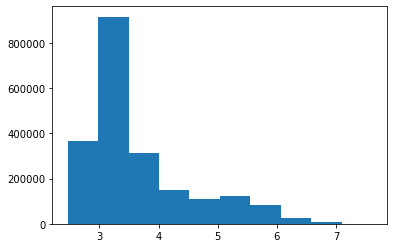

In [44]:
plt.hist(np.log10(T).flatten())

# other snippets (can ignore)

In [31]:
# export data as LAS for LIDAR-based visualization tools

import laspy
from laspy.file import File
import numpy as np

T_scaled = np.empty(len(ad['PartType0', 'Temperature']))
for i in range(len(T)):
    T_scaled[i] = (np.log10(T[i])-Tmin)/(Tmax - Tmin)

header = laspy.header.Header(point_format=2)
header.file_sig = 'LASF' 
outFile = File("test.las", mode = "w", header = header)
outFile.header.scale = [0.00000001,0.00000001,0.00000001]
# outFile.point_format
outFile.x = X
outFile.y = Y
outFile.z = Z
outFile.red = T_scaled*256
outFile.green = T_scaled*256
outFile.blue = T_scaled*256
outFile.close()

In [5]:
ds.derived_field_list

[('PartType0', 'AExpMaximumTemperature'),
 ('PartType0', 'C_density'),
 ('PartType0', 'C_fraction'),
 ('PartType0', 'C_mass'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_number_density'),
 ('PartType0', 'C_p0_density'),
 ('PartType0', 'C_p0_fraction'),
 ('PartType0', 'C_p0_mass'),
 ('PartType0', 'C_p0_number_density'),
 ('PartType0', 'C_p1_density'),
 ('PartType0', 'C_p1_fraction'),
 ('PartType0', 'C_p1_mass'),
 ('PartType0', 'C_p1_number_density'),
 ('PartType0', 'C_p2_density'),
 ('PartType0', 'C_p2_fraction'),
 ('PartType0', 'C_p2_mass'),
 ('PartType0', 'C_p2_number_density'),
 ('PartType0', 'C_p3_density'),
 ('PartType0', 'C_p3_fraction'),
 ('PartType0', 'C_p3_mass'),
 ('PartType0', 'C_p3_number_density'),
 ('PartType0', 'C_p4_density'),
 ('PartType0', 'C_p4_fraction'),
 ('PartType0', 'C_p4_mass'),
 ('PartType0', 'C_p4_number_density'),
 ('PartType0', 'C_p5_density'),
 ('PartType0', 'C_p5_fraction'),
 ('PartType0', 'C_p5_mass'),
 ('PartType0', 'C_p5_number_density'),
 ('

In [3]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0100N1504', 100.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    subHaloQuery = "SELECT \
                    SH.GalaxyID as GalaxyID, \
                    SH.GroupID as GroupID, \
                    SH.Snapnum as Snapnum, \
                    SH.Redshift as Redshift, \
                    SH.CentreOfMass_x as CentreOfMass_x, \
                    SH.CentreOfMass_y as CentreOfMass_y, \
                    SH.CentreOfMass_z as CentreOfMass_z, \
                    SH.MassType_Gas as MassType_Gas, \
                    SH.MassType_DM as MassType_DM, \
                    SH.MassType_Star as MassType_Star, \
                    SH.MassType_BH as MassType_BH, \
                    SH.BlackHoleMass as BlackHoleMass, \
                    SH.BlackHoleMassAccretionRate as BlackHoleMassAccretionRate, \
                    SH.StarFormationRate as StarFormationRate, \
                    SH.StellarVelDisp as StellarVelDisp,\
                    SH.Velocity_x as Velocity_x, \
                    SH.Velocity_y as Velocity_y, \
                    SH.Velocity_z as Velocity_z, \
                    SH.Vmax as Vmax, \
                    SH.SF_Hydrogen as SF_Hydrogen, \
                    SH.SF_Helium as SF_Helium, \
                    SH.SF_Carbon as SF_Carbon, \
                    SH.SF_Nitrogen as SF_Nitrogen, \
                    SH.SF_Oxygen as SF_Oxygen, \
                    SH.SF_Neon as SF_Neon, \
                    SH.SF_Magnesium as SF_Magnesium, \
                    SH.SF_Silicon as SF_Silicon, \
                    SH.SF_Iron as SF_Iron, \
                    SH.SF_Mass as SF_Mass, \
                    SH.SF_MassFromAGB as SF_MassFromAGB, \
                    SH.SF_MassFromSNII as SF_MassFromSNII, \
                    SH.SF_MassFromSNIA as SF_MassFromSNIA, \
                    SH.SF_Metallicity as SF_Metallicity, \
                    SH.SF_Spin_x as SF_Spin_x, \
                    SH.SF_Spin_y as SF_Spin_y, \
                    SH.SF_Spin_z as SF_Spin_z, \
                    SH.NSF_Hydrogen as NSF_Hydrogen, \
                    SH.NSF_Helium as NSF_Helium, \
                    SH.NSF_Carbon as NSF_Carbon, \
                    SH.NSF_Nitrogen as NSF_Nitrogen, \
                    SH.NSF_Oxygen as NSF_Oxygen, \
                    SH.NSF_Neon as NSF_Neon, \
                    SH.NSF_Magnesium as NSF_Magnesium, \
                    SH.NSF_Silicon as NSF_Silicon, \
                    SH.NSF_Iron as NSF_Iron, \
                    SH.NSF_Mass as NSF_Mass, \
                    SH.NSF_MassFromAGB as NSF_MassFromAGB, \
                    SH.NSF_MassFromSNII as NSF_MassFromSNII, \
                    SH.NSF_MassFromSNIA as NSF_MassFromSNIA, \
                    SH.NSF_Metallicity as NSF_Metallicity, \
                    SH.NSF_Spin_x as NSF_Spin_x, \
                    SH.NSF_Spin_y as NSF_Spin_y, \
                    SH.NSF_Spin_z as NSF_Spin_z, \
                    SH.Stars_Hydrogen as Stars_Hydrogen, \
                    SH.Stars_Helium as Stars_Helium, \
                    SH.Stars_Carbon as Stars_Carbon, \
                    SH.Stars_Nitrogen as Stars_Nitrogen, \
                    SH.Stars_Oxygen as Stars_Oxygen, \
                    SH.Stars_Neon as Stars_Neon, \
                    SH.Stars_Magnesium as Stars_Magnesium, \
                    SH.Stars_Silicon as Stars_Silicon, \
                    SH.Stars_Iron as Stars_Iron, \
                    SH.Stars_Mass as Stars_Mass, \
                    SH.Stars_MassFromAGB as Stars_MassFromAGB, \
                    SH.Stars_MassFromSNII as Stars_MassFromSNII, \
                    SH.Stars_MassFromSNIA as Stars_MassFromSNIA, \
                    SH.Stars_Metallicity as Stars_Metallicity, \
                    SH.Stars_Spin_x as Stars_Spin_x, \
                    SH.Stars_Spin_y as Stars_Spin_y, \
                    SH.Stars_Spin_z as Stars_Spin_z \
                FROM \
                    %s_SubHalo as SH \
                WHERE \
                    SH.Snapnum = 28"%(sim_name)
    
    # Execute Query
    subHaloData = sql.execute_query(con,subHaloQuery)
    print(len(subHaloData))

RefL0100N1504
2275510


In [ ]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0100N1504', 100.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    subHaloQuery = "SELECT \
                    SH.GalaxyID as GalaxyID, \
                    SH.GroupID as GroupID, \
                    SH.Snapnum as Snapnum, \
                    SH.Redshift as Redshift, \
                    SH.CentreOfMass_x as CentreOfMass_x, \
                    SH.CentreOfMass_y as CentreOfMass_y, \
                    SH.CentreOfMass_z as CentreOfMass_z, \
                    SH.MassType_Gas as MassType_Gas, \
                    SH.MassType_DM as MassType_DM, \
                    SH.MassType_Star as MassType_Star, \
                    SH.MassType_BH as MassType_BH, \
                    SH.BlackHoleMass as BlackHoleMass, \
                    SH.BlackHoleMassAccretionRate as BlackHoleMassAccretionRate, \
                    SH.StarFormationRate as StarFormationRate, \
                    SH.StellarVelDisp as StellarVelDisp,\
                    SH.Velocity_x as Velocity_x, \
                    SH.Velocity_y as Velocity_y, \
                    SH.Velocity_z as Velocity_z, \
                    SH.Vmax as Vmax, \
                    SH.SF_Hydrogen as SF_Hydrogen, \
                    SH.SF_Helium as SF_Helium, \
                    SH.SF_Carbon as SF_Carbon, \
                    SH.SF_Nitrogen as SF_Nitrogen, \
                    SH.SF_Oxygen as SF_Oxygen, \
                    SH.SF_Neon as SF_Neon, \
                    SH.SF_Magnesium as SF_Magnesium, \
                    SH.SF_Silicon as SF_Silicon, \
                    SH.SF_Iron as SF_Iron, \
                    SH.SF_Mass as SF_Mass, \
                    SH.SF_MassFromAGB as SF_MassFromAGB, \
                    SH.SF_MassFromSNII as SF_MassFromSNII, \
                    SH.SF_MassFromSNIA as SF_MassFromSNIA, \
                    SH.SF_Metallicity as SF_Metallicity, \
                    SH.SF_Spin_x as SF_Spin_x, \
                    SH.SF_Spin_y as SF_Spin_y, \
                    SH.SF_Spin_z as SF_Spin_z, \
                    SH.NSF_Hydrogen as NSF_Hydrogen, \
                    SH.NSF_Helium as NSF_Helium, \
                    SH.NSF_Carbon as NSF_Carbon, \
                    SH.NSF_Nitrogen as NSF_Nitrogen, \
                    SH.NSF_Oxygen as NSF_Oxygen, \
                    SH.NSF_Neon as NSF_Neon, \
                    SH.NSF_Magnesium as NSF_Magnesium, \
                    SH.NSF_Silicon as NSF_Silicon, \
                    SH.NSF_Iron as NSF_Iron, \
                    SH.NSF_Mass as NSF_Mass, \
                    SH.NSF_MassFromAGB as NSF_MassFromAGB, \
                    SH.NSF_MassFromSNII as NSF_MassFromSNII, \
                    SH.NSF_MassFromSNIA as NSF_MassFromSNIA, \
                    SH.NSF_Metallicity as NSF_Metallicity, \
                    SH.NSF_Spin_x as NSF_Spin_x, \
                    SH.NSF_Spin_y as NSF_Spin_y, \
                    SH.NSF_Spin_z as NSF_Spin_z, \
                    SH.Stars_Hydrogen as Stars_Hydrogen, \
                    SH.Stars_Helium as Stars_Helium, \
                    SH.Stars_Carbon as Stars_Carbon, \
                    SH.Stars_Nitrogen as Stars_Nitrogen, \
                    SH.Stars_Oxygen as Stars_Oxygen, \
                    SH.Stars_Neon as Stars_Neon, \
                    SH.Stars_Magnesium as Stars_Magnesium, \
                    SH.Stars_Silicon as Stars_Silicon, \
                    SH.Stars_Iron as Stars_Iron, \
                    SH.Stars_Mass as Stars_Mass, \
                    SH.Stars_MassFromAGB as Stars_MassFromAGB, \
                    SH.Stars_MassFromSNII as Stars_MassFromSNII, \
                    SH.Stars_MassFromSNIA as Stars_MassFromSNIA, \
                    SH.Stars_Metallicity as Stars_Metallicity, \
                    SH.Stars_Spin_x as Stars_Spin_x, \
                    SH.Stars_Spin_y as Stars_Spin_y, \
                    SH.Stars_Spin_z as Stars_Spin_z \
                FROM \
                    %s_SubHalo as SH \
                WHERE \
                    SH.Snapnum = 28"%(sim_name)
    
    # Execute Query
    subHaloData = sql.execute_query(con,subHaloQuery)
    print(len(subHaloData))

In [22]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0025N0376', 25.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    magnitudesQuery = "SELECT \
                    MAG.GalaxyID as GalaxyID, \
                    MAG.u_nodust as u_nodust, \
                    MAG.g_nodust as g_nodust, \
                    MAG.r_nodust as r_nodust, \
                    MAG.i_nodust as i_nodust, \
                    MAG.z_nodust as z_nodust, \
                    MAG.Y_nodust as Y_nodust, \
                    MAG.J_nodust as J_nodust, \
                    MAG.H_nodust as H_nodust, \
                    MAG.K_nodust as K_nodust \
                FROM \
                    %s_SubHalo as SH, \
                    %s_Magnitudes as MAG \
                WHERE \
                    SH.Snapnum = 28 \
                    and MAG.GalaxyID = SH.GalaxyID"%(sim_name,sim_name)
    
    # Execute Query
    magnitudesData = sql.execute_query(con,magnitudesQuery)
    print(len(magnitudesData))

RefL0025N0376
499


In [24]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0025N0376', 25.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    fofQuery = "SELECT \
                    FOF.GroupID as GroupID, \
                    FOF.Redshift as Redshift, \
                    FOF.Snapnum as Snapnum, \
                    FOF.GroupCentreOfPotential_x as GroupCentreOfPotential_x, \
                    FOF.GroupCentreOfPotential_y as GroupCentreOfPotential_y, \
                    FOF.GroupCentreOfPotential_z as GroupCentreOfPotential_z, \
                    FOF.GroupMass as GroupMass, \
                    FOF.Group_M_Crit200 as Group_M_Crit200, \
                    FOF.Group_M_Crit500 as Group_M_Crit500, \
                    FOF.Group_M_Crit2500 as Group_M_Crit2500, \
                    FOF.Group_M_Mean200 as Group_M_Mean200, \
                    FOF.Group_M_Mean500 as Group_M_Mean500, \
                    FOF.Group_M_Mean2500 as Group_M_Mean2500, \
                    FOF.Group_M_TopHat200 as Group_M_TopHat200, \
                    FOF.Group_R_Crit200 as Group_R_Crit200, \
                    FOF.Group_R_Crit500 as Group_R_Crit500, \
                    FOF.Group_R_Crit2500 as Group_R_Crit2500, \
                    FOF.Group_R_Mean200 as Group_R_Mean200, \
                    FOF.Group_R_Mean500 as Group_R_Mean500, \
                    FOF.Group_R_Mean2500 as Group_R_Mean2500, \
                    FOF.Group_R_TopHat200 as Group_R_TopHat200, \
                    FOF.NumOfSubhalos as NumOfSubhalos \
                FROM \
                    %s_SubHalo as SH, \
                    %s_FOF as FOF \
                WHERE \
                    SH.Snapnum = 28 \
                    and FOF.Snapnum = SH.Snapnum \
                    and FOF.GroupID = SH.GroupID"%(sim_name,sim_name)
    
    # Execute Query
    fofData = sql.execute_query(con,fofQuery)
    print(len(fofData))

RefL0025N0376
37368


In [25]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0025N0376', 25.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    morphoKinemQuery = "SELECT \
                    MK.GalaxyID as GalaxyID, \
                    MK.DMEllipticity as DMEllipticity, \
                    MK.DiscToTotal as DiscToTotal, \
                    MK.DispAnisotropy as DispAnisotropy, \
                    MK.Ellipticity as Ellipticity, \
                    MK.KappaCoRot as KappaCoRot, \
                    MK.MedOrbitCircu as MedOrbitiurcu, \
                    MK.RotToDispRatio as RotToDispRatio, \
                    MK.Triaxiality as Triaxiality \
                FROM \
                    %s_SubHalo as SH, \
                    %s_MorphoKinem as MK \
                WHERE \
                    SH.Snapnum = 28 \
                    and MK.GalaxyID = SH.GalaxyID"%(sim_name,sim_name)
    
    # Execute Query
    morphoKinemData = sql.execute_query(con,morphoKinemQuery)
    print(len(morphoKinemData))

RefL0025N0376
349


In [27]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0025N0376', 25.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    dustyFluxesQuery = "SELECT \
                    DF.* \
                FROM \
                    %s_SubHalo as SH, \
                    %s_DustyFluxes as DF \
                WHERE \
                    SH.Snapnum = 28 \
                    and DF.GalaxyID = SH.GalaxyID"%(sim_name,sim_name)
    
    # Execute Query
    dustyFluxesData = sql.execute_query(con,dustyFluxesQuery)
    print(len(dustyFluxesData))

RefL0025N0376
140


In [42]:
dustyFluxesData

array([(   768, 0.00099094, 0.00142702, 0.01016499, 0.04079688, 0.07888173, 0.10512362, 0.14002463, 0.19085918, 0.23785914, 0.19859003, 0.13716108, 0.17387801, 0.1921603 , 0.23561771, 0.19163923, 0.00958179, 0.03159834, 0.06028774, 0.09210822, 0.13395974, 0.18917237, 0.06963399, 0.11108351, 0.07491182, 0.08905941, 0.24291666, 0.08282583, 0.22785206,  1.5718286 , 4.7029066e+00, 0.10762689, 0.07798686, 0.0781765 , 0.11017531, 0.2492108 ,  2.491061  ,  5.74358   ,  2.4015129 , 4.7581663e+00,  5.486131  ,  3.0421898 ,  1.4517728 , 0.5468839 , 0.74196583, 0.09997308, 0.00050508, 0.00102776, 0.0103052 , 0.04277153, 0.08190248, 0.10919788, 0.14490242, 0.19625954, 0.24299075, 0.20162933, 0.1420066 , 0.17988604, 0.19744478, 0.2406954 , 0.19453362, 0.00970492, 0.03314589, 0.06305801, 0.09560069, 0.13870445, 0.19456664, 0.00039964, 0.00083895, 0.00926961, 0.03919573, 0.07609073, 0.10223133, 0.13615923, 0.18551956, 0.23204799, 0.19412318, 0.13339362, 0.16917163, 0.1866982 , 0.22982569, 0.18732803,

In [17]:
# EAGLE SQL Query Code
# Based off of example code in Appendix A: https://arxiv.org/pdf/1510.01320.pdf

# Array of chosen simulations, where entries include name and size
# NOTE: Mock-gri images are not available for the 12 Mpc box

#mySims = np.array([('RefL0012N0188', 12.), ('RefL0025N0376', 25.)]) #insert list of simulation names
mySims = np.array([('RefL0025N0376', 25.)])


# Connect to EAGLE database with username and password
username = "skd723"
password = "AYU26xib"

con = sql.connect(username,password)

for sim_name, sim_size in mySims:
    print(sim_name)
    
    # Define query
    # Units are defined at http://virgodb.dur.ac.uk:8080/Eagle/ (use above credentials or create new ones)
    myQuery = "SELECT \
                    SH.GalaxyID as GalaxyID_SH, \
                    SH.GroupID as GroupID_SH, \
                    SH.Snapnum as Snapnum_SH, \
                    SH.Redshift as Redshift_SH, \
                    SH.CentreOfMass_x as CentreOfMass_x, \
                    SH.CentreOfMass_y as CentreOfMass_y, \
                    SH.CentreOfMass_z as CentreOfMass_z, \
                    SH.MassType_Gas as MassType_Gas, \
                    SH.MassType_DM as MassType_DM, \
                    SH.MassType_Star as MassType_Star, \
                    SH.MassType_BH as MassType_BH, \
                    SH.BlackHoleMass as BlackHoleMass, \
                    SH.BlackHoleMassAccretionRate as BlackHoleMassAccretionRate, \
                    SH.StarFormationRate as StarFormationRate, \
                    SH.StellarVelDisp as StellarVelDisp,\
                    SH.Velocity_x as Velocity_x, \
                    SH.Velocity_y as Velocity_y, \
                    SH.Velocity_z as Velocity_z, \
                    SH.Vmax as Vmax, \
                    SH.SF_Hydrogen as SF_Hydrogen, \
                    SH.SF_Helium as SF_Helium, \
                    SH.SF_Carbon as SF_Carbon, \
                    SH.SF_Nitrogen as SF_Nitrogen, \
                    SH.SF_Oxygen as SF_Oxygen, \
                    SH.SF_Neon as SF_Neon, \
                    SH.SF_Magnesium as SF_Magnesium, \
                    SH.SF_Silicon as SF_Silicon, \
                    SH.SF_Iron as SF_Iron, \
                    SH.SF_Mass as SF_Mass, \
                    SH.SF_MassFromAGB as SF_MassFromAGB, \
                    SH.SF_MassFromSNII as SF_MassFromSNII, \
                    SH.SF_MassFromSNIA as SF_MassFromSNIA, \
                    SH.SF_Metallicity as SF_Metallicity, \
                    SH.SF_Spin_x as SF_Spin_x, \
                    SH.SF_Spin_y as SF_Spin_y, \
                    SH.SF_Spin_z as SF_Spin_z, \
                    SH.NSF_Hydrogen as NSF_Hydrogen, \
                    SH.NSF_Helium as NSF_Helium, \
                    SH.NSF_Carbon as NSF_Carbon, \
                    SH.NSF_Nitrogen as NSF_Nitrogen, \
                    SH.NSF_Oxygen as NSF_Oxygen, \
                    SH.NSF_Neon as NSF_Neon, \
                    SH.NSF_Magnesium as NSF_Magnesium, \
                    SH.NSF_Silicon as NSF_Silicon, \
                    SH.NSF_Iron as NSF_Iron, \
                    SH.NSF_Mass as NSF_Mass, \
                    SH.NSF_MassFromAGB as NSF_MassFromAGB, \
                    SH.NSF_MassFromSNII as NSF_MassFromSNII, \
                    SH.NSF_MassFromSNIA as NSF_MassFromSNIA, \
                    SH.NSF_Metallicity as NSF_Metallicity, \
                    SH.NSF_Spin_x as NSF_Spin_x, \
                    SH.NSF_Spin_y as NSF_Spin_y, \
                    SH.NSF_Spin_z as NSF_Spin_z, \
                    SH.Stars_Hydrogen as Stars_Hydrogen, \
                    SH.Stars_Helium as Stars_Helium, \
                    SH.Stars_Carbon as Stars_Carbon, \
                    SH.Stars_Nitrogen as Stars_Nitrogen, \
                    SH.Stars_Oxygen as Stars_Oxygen, \
                    SH.Stars_Neon as Stars_Neon, \
                    SH.Stars_Magnesium as Stars_Magnesium, \
                    SH.Stars_Silicon as Stars_Silicon, \
                    SH.Stars_Iron as Stars_Iron, \
                    SH.Stars_Mass as Stars_Mass, \
                    SH.Stars_MassFromAGB as Stars_MassFromAGB, \
                    SH.Stars_MassFromSNII as Stars_MassFromSNII, \
                    SH.Stars_MassFromSNIA as Stars_MassFromSNIA, \
                    SH.Stars_Metallicity as Stars_Metallicity, \
                    SH.Stars_Spin_x as Stars_Spin_x, \
                    SH.Stars_Spin_y as Stars_Spin_y, \
                    SH.Stars_Spin_z as Stars_Spin_z, \
                    MAG.u_nodust as u_nodust, \
                    MAG.g_nodust as g_nodust, \
                    MAG.r_nodust as r_nodust, \
                    MAG.i_nodust as i_nodust, \
                    MAG.z_nodust as z_nodust, \
                    MAG.Y_nodust as Y_nodust, \
                    MAG.J_nodust as J_nodust, \
                    MAG.H_nodust as H_nodust, \
                    MAG.K_nodust as K_nodust, \
                    FOF.Redshift as Redshift_FOF, \
                    FOF.GroupCentreOfPotential_x as GroupCentreOfPotential_x, \
                    FOF.GroupCentreOfPotential_y as GroupCentreOfPotential_y, \
                    FOF.GroupCentreOfPotential_z as GroupCentreOfPotential_z, \
                    FOF.GroupMass as GroupMass, \
                    FOF.Group_M_Crit200 as Group_M_Crit200, \
                    FOF.Group_M_Crit500 as Group_M_Crit500, \
                    FOF.Group_M_Crit2500 as Group_M_Crit2500, \
                    FOF.Group_M_Mean200 as Group_M_Mean200, \
                    FOF.Group_M_Mean500 as Group_M_Mean500, \
                    FOF.Group_M_Mean2500 as Group_M_Mean2500, \
                    FOF.Group_M_TopHat200 as Group_M_TopHat200, \
                    FOF.Group_R_Crit200 as Group_R_Crit200, \
                    FOF.Group_R_Crit500 as Group_R_Crit500, \
                    FOF.Group_R_Crit2500 as Group_R_Crit2500, \
                    FOF.Group_R_Mean200 as Group_R_Mean200, \
                    FOF.Group_R_Mean500 as Group_R_Mean500, \
                    FOF.Group_R_Mean2500 as Group_R_Mean2500, \
                    FOF.Group_R_TopHat200 as Group_R_TopHat200, \
                    FOF.NumOfSubhalos as NumOfSubhalos, \
                    MK.DMEllipticity as DMEllipticity, \
                    MK.DiscToTotal as DiscToTotal, \
                    MK.DispAnisotropy as DispAnisotropy, \
                    MK.Ellipticity as Ellipticity, \
                    MK.KappaCoRot as KappaCoRot, \
                    MK.MedOrbitCircu as MedOrbitiurcu, \
                    MK.RotToDispRatio as RotToDispRatio, \
                    MK.Triaxiality as Triaxiality, \
                    DF.* \
                FROM \
                    %s_SubHalo as SH, \
                    %s_Magnitudes as MAG, \
                    %s_FOF as FOF, \
                    %s_MorphoKinem as MK, \
                    %s_DustyFluxes as DF \
                WHERE \
                    SH.Snapnum = 28 \
                    and FOF.Snapnum = SH.Snapnum \
                    and FOF.GroupID = SH.GroupID \
                    and MAG.GalaxyID = SH.GalaxyID \
                    and MK.GalaxyID = SH.GalaxyID \
                    and DF.GalaxyID = SH.GalaxyID"%(sim_name,sim_name,sim_name,sim_name,sim_name)
    
    # Execute Query
    myData = sql.execute_query(con,myQuery)
    
#     GALEX_FUV as GALEX_FUV, \
#                     DF.GALEX_FUV_e as GALEX_FUV_e, \
#                     DF.GALEX_FUV_f as GALEX_FUV_f, \
#                     DF.GALEX_NUV as GALEX_NUV, \
#                     DF.GALEX_NUV_e as GALEX_NUV_e, \
#                     DF.GALEX_NUV_f as GALEX_NUV_f, \
#                     DF.SDSS_u as SDSS_u, \
#                     DF.SDSS_u_e as SDSS_u_e, \
#                     DF.SDSS_u_f as SDSS_u_f, \
#                     DF.SDSS_g as SDSS_g, \
#                     DF.SDSS_g_e as SDSS_g_e, \
#                     DF.SDSS_g_f as SDSS_g_f, \
#                     DF.SDSS_r as SDSS_r, \
#                     DF.SDSS_r_e as SDSS_r_e, \
#                     DF.SDSS_r_f as SDSS_r_f, \
#                     DF.SDSS_i as SDSS_i, \
#                     DF.SDSS_i_e as SDSS_i_e, \
#                     DF.SDSS_i_f as SDSS_i_f, \
#                     DF.SDSS_z as SDSS_z, \
#                     DF.SDSS_z_e as SDSS_z_e, \
#                     DF.SDSS_z_f as SDSS_z_f, \
#                     DF.TwoMASS_J as TwoMASS_J, \
#                     DF.TwoMASS_J_e as TwoMASS_J_e, \
#                     DF.TwoMASS_J_f as TwoMASS_J_f, \
#                     DF.TwoMASS_H as TwoMASS_H, \
#                     DF.TwoMASS_H_e as TwoMASS_H_e, \
#                     DF.TwoMASS_H_f as TwoMASS_H_f, \
#                     DF.TwoMASS_Ks as TwoMASS_Ks, \
#                     DF.TwoMASS_Ks_e as TwoMASS_Ks_e, \
#                     DF.TwoMASS_Ks_f as TwoMASS_Ks_f, \
#                     DF.UKIDSS_Z as UKIDSS_Z, \
#                     DF.UKIDSS_Z_e as UKIDSS_Z_e, \
#                     DF.UKIDSS_Z_f as UKIDSS_Z_f, \
#                     DF.UKIDSS_Y as UKIDSS_Y, \
#                     DF.UKIDSS_Y_e as UKIDSS_Y_e, \
#                     DF.UKIDSS_Y_f as UKIDSS_Y_f, \
#                     DF.UKIDSS_J as UKIDSS_J, \
#                     DF.UKIDSS_J_e as UKIDSS_J_e, \
#                     DF.UKIDSS_J_f as UKIDSS_J_f, \
#                     DF.UKIDSS_H as UKIDSS_H, \
#                     DF.UKIDSS_H_e as UKIDSS_H_e, \
#                     DF.UKIDSS_H_f as UKIDSS_H_f, \
#                     DF.UKIDSS_K as UKIDSS_K, \
#                     DF.UKIDSS_K_e as UKIDSS_K_e, \
#                     DF.UKIDSS_K_f as UKIDSS_K_f, \
#                     DF.Johnson_U as Johnson_U, \
#                     DF.Johnson_U_e as Johnson_U_e, \
#                     DF.Johnson_U_f as Johnson_U_f, \
#                     DF.Johnson_B as Johnson_B, \
#                     DF.Johnson_B_e as Johnson_B_e, \
#                     DF.Johnson_B_f as Johnson_B_f, \
#                     DF.Johnson_V as Johnson_V, \
#                     DF.Johnson_V_e as Johnson_V_e, \
#                     DF.Johnson_V_f as Johnson_V_f, \
#                     DF.Johnson_R as Johnson_R, \
#                     DF.Johnson_R_e as Johnson_R_e, \
#                     DF.Johnson_R_f as Johnson_R_f, \
#                     DF.Johnson_I as Johnson_I, \
#                     DF.Johnson_I_e as Johnson_I_e, \
#                     DF.Johnson_I_f as Johnson_I_f, \
#                     DF.Johnson_J as Johnson_J, \
#                     DF.Johnson_J_e as Johnson_J_e, \
#                     DF.Johnson_J_f as Johnson_J_f, \
#                     DF.Johnson_M as Johnson_M, \
#                     DF.WISE_W1 as WISE_W1, \
#                     DF.WISE_W2 as WISE_W2, \
#                     DF.WISE_W3 as WISE_W3, \
#                     DF.WISE_W4 as WISE_W4, \
#                     DF.IRAS_12 as IRAS_12, \
#                     DF.IRAS_25 as IRAS_25, \
#                     DF.IRAS_60 as IRAS_60, \
#                     DF.IRAS_100 as IRAS_100, \
#                     DF.IRAC_I1 as IRAC_I1, \
#                     DF.IRAC_I2 as IRAC_I2, \
#                     DF.IRAC_I3 as IRAC_I3, \
#                     DF.IRAC_I4 as IRAC_I4, \
#                     DF.MIPS_24 as MIPS_24, \
#                     DF.MIPS_70 as MIPS_70, \
#                     DF.MIPS_160 as MIPS_160, \
#                     DF.PACS_70 as PACS_70, \
#                     DF.PACS_100 as PACS_100, \
#                     DF.PACS_160 as PACS_160, \
#                     DF.SPIRE_250 as SPIRE_250, \
#                     DF.SPIRE_350 as SPIRE_350, \
#                     DF.SPIRE_500 as SPIRE_500, \
#                     DF.SCUBA2_450 as SCUBA2_450, \
#                     DF.SCUBA2_850 as SCUBA2_850, \
#                     DF.ALMA_6 as ALMA_6, \
#                     DF.ALMA_7 as ALMA_7, \
#                     DF.ALMA_8 as ALMA_8, \
#                     DF.ALMA_9 as ALMA_9, \
#                     DF.ALMA_10 as ALMA_10 \

RefL0025N0376


In [6]:
# sorted(ds.field_list)

# print(len(ad['PartType0', 'Coordinates']))

In [20]:
ad['PartType0','Hydrogen'].units.in_cgs()

AttributeError: 'Unit' object has no attribute 'in_cgs'

In [22]:
right_edge = ad.right_edge
right_edge

unyt_array([16.9425, 16.9425, 16.9425], 'code_length')

In [5]:

# _, c = ds.find_max(('gas', 'density'))
# p = yt.ProjectionPlot(ds, 'x', ('gas', 'density'), center=c, width=(1, 'Mpc'))
# p.set_zlim(('gas', 'density'), 2e-6, 2e-2)
# p.show()


yt : [INFO     ] 2020-08-28 14:16:20,206 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2020-08-28 14:16:20,207 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-08-28 14:16:20,208 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-08-28 14:16:20,209 Parameters: domain_right_edge         = [8.47125 8.47125 8.47125]
yt : [INFO     ] 2020-08-28 14:16:20,210 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-08-28 14:16:20,211 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2020-08-28 14:16:20,211 Parameters: omega_lambda              = 0.693
yt : [INFO     ] 2020-08-28 14:16:20,212 Parameters: omega_matter              = 0.307
yt : [INFO     ] 2020-08-28 14:16:20,213 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-08-28 14:16:20,214 Parameters: hubble_constant           = 0.6777


In [25]:
import yt
from yt.extensions.astro_analysis.halo_analysis.halo_catalog import HaloCatalog
hc = HaloCatalog(data_ds=ds, ptype="stars", finder_method='fof')
hc.create()

yt : [WARNING  ] 2020-08-17 15:59:06,982 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [INFO     ] 2020-08-17 15:59:09,072 Using a linking length of 8.444e-04
yt : [INFO     ] 2020-08-17 15:59:09,073 Initializing FOF
yt : [WARNING  ] 2020-08-17 15:59:09,073 No particle_type, no creation_time, so not distinguishing.
yt : [INFO     ] 2020-08-17 15:59:55,709 Parsing outputs


KeyboardInterrupt: 

In [10]:
fn

'RefL0012N0188/snapshot_028_z000p000/snap_028_z000p000.0.hdf5'

In [42]:
cgrid = ds.covering_grid(1,ds.domain_left_edge,[64,64,64])
size = 64
obj = createGrid(ds,size)
preprocessAttribute(obj,size,'PartType0', 'H_number_density')            
mass = cgrid['PartType0','Mass']

In [16]:
print(ad)

YTRegion (snap_028_z000p000): , center=[1.92854875e+25 1.92854875e+25 1.92854875e+25] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.8570975e+25 3.8570975e+25 3.8570975e+25] cm


In [68]:
ad['deposit', 'PartType1_mass']

YTNonIndexedDataContainer: The data container (<class 'yt.data_objects.particle_container.ParticleContainer'>) is an unindexed type.  Operations such as ires, icoords, fcoords and fwidth will not work on it.

In [29]:
import numpy as np
import h5py
def read_dataset_dm_mass():
    f = h5py.File(fn, 'r')
    h = f['Header'].attrs.get('HubbleParam')
    a = f['Header'].attrs.get('Time')
    dm_mass = f['Header'].attrs.get('MassTable')[1]
    n_particles = f['Header'].attrs.get('NumPart_Total')[1]
    m = np.ones( n_particles , dtype='f8') * dm_mass
    cgs = f['PartType0/Mass'].attrs.get('CGSConversionFactor')
    aexp = f['PartType0/Mass'].attrs.get('aexp−scale−exponent')
    hexp = f['PartType0/Mass'].attrs.get('h−scale−exponent')
    f.close()
    # Convert t o p h y s i c a l .
#     print(cgs,a,aexp,h,hexp)
#     m = np.multiply(m, cgs * a**aexp * h**hexp , dtype='f8')
    return m
m = read_dataset_dm_mass()
print(m)

[0.00065703 0.00065703 0.00065703 ... 0.00065703 0.00065703 0.00065703]


In [15]:


# X = np.empty(len(ad['PartType0', 'Coordinates']))
# Y = np.empty(len(ad['PartType0', 'Coordinates']))
# Z = np.empty(len(ad['PartType0', 'Coordinates']))
T = np.empty(len(ad['PartType0', 'Temperature']))


for i in range(len(ad['PartType0', 'Coordinates'])):
#     X[i] = float(ad['PartType0', 'Coordinates'][i][0])
#     Y[i] = float(ad['PartType0', 'Coordinates'][i][1])
#     Z[i] = float(ad['PartType0', 'Coordinates'][i][2])
    T[i] = float(ad['PartType0', 'Temperature'][i])
    

In [17]:
Tmin = np.log10(np.amin(T))
Tmax = np.log10(np.amax(T))

In [77]:
positions = np.array(ad['PartType0', 'Coordinates'])
positions = np.around(positions,6)
positions = positions.tolist()

In [78]:
import random
L_gas = np.arange(len(np.array(ad['PartType0', 'Coordinates'])))
random.shuffle(L_gas)

In [79]:

def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])


N = 1000000
length = len(L_gas)
N_files = truncate((length/N),0)
remainder = ((length/N)%1)*N

def subset(k):
    for i in range(k):
        gas_shuffle = []
        for j in range(N):
            index = L_gas[(i*N)+j]
            gas_shuffle.append(positions[index])
        with open('gasLookup-sub'+str(k)+'.'+str(i)+'.json', 'w') as file:
            json.dump(gas_shuffle, file)


subset(16)


# for i in range(1):
#     gas_shuffle = []
#     for j in range(N):
#         index = L_gas[(i*N)+j]
#         gas_shuffle.append(positions[index])
#     with open('gasLookup-sub'+str(i)+'1.json', 'w') as file:
#         json.dump(gas_shuffle, file)
        
print(gas_shuffle[0])

[4.410931, 5.076711, 2.305592]


In [60]:
import wget
url = 'http://www.futurecrew.com/skaven/song_files/mp3/razorback.mp3'
filename = wget.download(url)
filename

381559.0000000002


In [32]:
sorted(ds.field_list)

[('PartType0', 'AExpMaximumTemperature'),
 ('PartType0', 'Carbon'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'Entropy'),
 ('PartType0', 'GroupNumber'),
 ('PartType0', 'Helium'),
 ('PartType0', 'HostHalo_TVir_Mass'),
 ('PartType0', 'Hydrogen'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Iron'),
 ('PartType0', 'IronMassFracFromSNIa'),
 ('PartType0', 'Magnesium'),
 ('PartType0', 'Mass'),
 ('PartType0', 'MaximumTemperature'),
 ('PartType0', 'MetalMassFracFromAGB'),
 ('PartType0', 'MetalMassFracFromSNII'),
 ('PartType0', 'MetalMassFracFromSNIa'),
 ('PartType0', 'Metallicity'),
 ('PartType0', 'Neon'),
 ('PartType0', 'Nitrogen'),
 ('PartType0', 'OnEquationOfState'),
 ('PartType0', 'Oxygen'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'Silicon'),
 ('PartType0', 'SmoothedIronMassFracFromSNIa'),
 ('PartType0', 'SmoothedMetallicity'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'SubGroupNumber'),
 ('PartType0', '

yt : [INFO     ] 2020-05-01 13:08:20,558 Max Value is 1.28602e-22 at 11.2205470803537573 16.5996915360893560 12.0006367632002515


In [8]:

# ds_example = yt.load("output_00080/info_00080.txt")
fname = ds.add_deposited_particle_field(('PartType0', 'Temperature'), method='simple_smooth')


In [10]:
len(ad[('all', 'GroupNumber')])

13289158

In [21]:
#https://yt-project.org/doc/reference/api/yt.data_objects.construction_data_containers.html#yt.data_objects.construction_data_containers.YTArbitraryGrid

left_edge = ds.domain_left_edge
right_edge = ds.domain_right_edge

obj = ds.arbitrary_grid(left_edge, right_edge,
                       dims=[128, 128, 128])
temp = obj["PartType0", "temperature"]
t = np.array(temp)
print(t)
# with open('temp512.json', 'w') as file:
#     json.dump(t.tolist(), file)

Interpolating SPH field ('PartType0', 'Temperature'): 35050000it [00:19, 2458521.25it/s]

KeyboardInterrupt: 

In [23]:
left_edge = ds.domain_left_edge
right_edge = ds.domain_right_edge
ds.add_deposited_particle_field(["PartType1", "Mass"],'nearest')

# obj = ds.arbitrary_grid(left_edge, right_edge,
#                        dims=[128, 128, 128])
# dm = obj["PartType0", "Mass"]
# print(dm)

RuntimeError: 

In [12]:
t = np.array(temp)

In [14]:
with open('temp512.json', 'w') as file:
    json.dump(t.tolist(), file)

In [7]:
print ("Length unit: ", ds.length_unit)
print ("Time unit: ", ds.time_unit)
print ("Mass unit: ", ds.mass_unit)
print ("Velocity unit: ", ds.velocity_unit)

# cm --> comoving
# dc --> comoving distance
# dp --> proper distance
# (1/(1+z))*dc = dp

Length unit:  1000.0001358008619 kpccm/h
Time unit:  3.085678e+19 s/h


AttributeError: 'unyt_quantity' object has no attribute 'inMsun'

In [73]:
print(ad['PartType0', 'Mass'][3])

0.0006570332889156362 code_mass


In [95]:

gas_particles = {}

def round_sig(x, sig=3):
    return round(x, sig-int(floor(log10(abs(x))))-1)

# there are 6381559 particles

min_d = float("inf")
min_t = float("inf")
min_H = float("inf")
min_C = float("inf")
min_sfr = float("inf")
min_met = float("inf")

max_d = float("-inf")
max_t = float("-inf")
max_H = float("-inf")
max_C = float("-inf")
max_sfr = float("-inf")
max_met = float("-inf")

for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
    d = float(ad['PartType0', 'Density'][i])
    t = float(ad['PartType0', 'Temperature'][i])
    H = float(ad['PartType0', 'Hydrogen'][i])
    C = float(ad['PartType0', 'Carbon'][i])
    sfr = float(ad['PartType0', 'StarFormationRate'][i])
    met = float(ad['PartType0', 'Metallicity'][i])
    
    if d < min_d:
        min_d = d
    if d > max_d:
        max_d = d
    
    if t < min_t:
        min_t = t
    if t > max_t:
        max_t = t
    
    if H < min_H:
        min_H = H
    if H > max_H:
        max_H = H
        
    if C < min_C:
        min_C = C
    if C > max_C:
        max_C = C
        
    if sfr < min_sfr:
        min_sfr = sfr
    if sfr > max_sfr:
        max_sfr = sfr

for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
    
    
    d = float(ad['PartType0', 'Density'][i])
    d = round((d-min_d)/(max_d-min_d),3)
    if math.isnan(d) is True:
        d = 'null'
    
    t = float(ad['PartType0', 'Temperature'][i])
    t = round((t-min_t)/(max_t-min_t),3)
    if math.isnan(t) is True:
        t = 'null'
    
    H = float(ad['PartType0', 'Hydrogen'][i])
    H = round((H-min_H)/(max_H-min_H),3)
    if math.isnan(H) is True:
        H = 'null'
    
    C = float(ad['PartType0', 'Carbon'][i])
    C = round((C-min_C)/(max_C-min_C),3)
    if math.isnan(C) is True:
        C = 'null'
    https://tumblrgallery.com/gallery/1879876
    sfr = float(ad['PartType0', 'StarFormationRate'][i])
    sfr = round((sfr-min_sfr)/(max_sfr-min_sfr),3)
    if math.isnan(sfr) is True:
        sfr = 'null'
    
    met = float(ad['PartType0', 'Metallicity'][i])
    met = round((met-min_met)/(max_met-min_met),3)
    if math.isnan(met) is True:
        met = 'null'
    
    gas_particles[i] = {
        'x':round(float(ad['PartType0', 'Coordinates'][i][0]),3),
        'y':round(float(ad['PartType0', 'Coordinates'][i][1]),3),
        'z':round(float(ad['PartType0', 'Coordinates'][i][2]),3),
        'd':d,
        't':t,
        'H':H,
        'C':C,
        'sfr':sfr,
        'met':met}
    
#     gas_particles[i] = 
#         {'x':round(float(ad['PartType0', 'Coordinates'][i][0]),3),
#         'y':round(float(ad['PartType0', 'Coordinates'][i][1]),3),
#         'z':round(float(ad['PartType0', 'Coordinates'][i][2]),3),
#         'd':float(ad['PartType0', 'Density'][i]),
#         't':float(ad['PartType0', 'Temperature'][i]),
#         'H':float(ad['PartType0', 'Hydrogen'][i]),
#         'C':float(ad['PartType0', 'Carbon'][i]),
#         'sfr':float(ad['PartType0', 'StarFormationRate'][i]),
#         'met':float(ad['PartType0', 'Metallicity'][i])}

with open('gas_particles.json', 'w') as file:
    json.dump(gas_particles, file)

In [17]:
dark_matter_particles = {}

for i in range(0,len(ad['PartType1', 'Coordinates'])-1):
    
    dark_matter_particles[i] = {
#         'particleID' : int(ad['PartType1', 'ParticleIDs'][i]),
        'x' : float(ad['PartType1', 'Coordinates'][i][0]),
        'y' : float(ad['PartType1', 'Coordinates'][i][1]),
        'z' : float(ad['PartType1', 'Coordinates'][i][2]),
#         'mass' : float(ad['PartType1', 'Mass'][i])
    }
    
with open('0012dark_matter_particles.json', 'w') as file:
    json.dump(dark_matter_particles, file)

In [15]:
star_particles = {}

for i in range(0,len(ad['PartType4', 'Coordinates'])-1):
    
    star_particles[i] = {
#         'particleID' : int(ad['PartType4', 'ParticleIDs'][i]),
        'x' : float(ad['PartType4', 'Coordinates'][i][0]),
        'y' : float(ad['PartType4', 'Coordinates'][i][1]),
        'z' : float(ad['PartType4', 'Coordinates'][i][2]),
        'mass' : round(float(np.log10(ad['PartType4', 'Mass'][i].in_units('Msun'))),2)
    }
with open('0012star_particles.json', 'w') as file:
    json.dump(star_particles, file)


In [23]:
np.log10(ad['PartType5','Mass'][10].in_units('Msun'))

array(6.25740773)

In [75]:
import json
black_hole_particles = {}

for i in range(0,len(ad['PartType5', 'Coordinates'])-1):
    
    black_hole_particles[i] = {
        'particleID' : int(ad['PartType5', 'ParticleIDs'][i]),
        'x' : float(ad['PartType5', 'Coordinates'][i][0]),
        'y' : float(ad['PartType5', 'Coordinates'][i][1]),
        'z' : float(ad['PartType5', 'Coordinates'][i][2]),
        'BH_Mass' : float(ad['PartType5', 'BH_Mass'][i])
    }

with open('black_hole_particles.json', 'w') as file:
    json.dump(black_hole_particles, file)

In [7]:
import math
left_edge = (ds.domain_left_edge).in_units('Mpc')
right_edge = (ds.domain_right_edge).in_units('Mpc')
print(left_edge,right_edge)


s = 16 # number of voxels per edge

edge_len_Mpc = (right_edge[0]).in_units('Mpc')-left_edge[0].in_units('Mpc')
delta = float((edge_len_Mpc/s)) #width of voxel in physical distance (Mpc)

arr = []
arr = np.empty(s*s*s)
print(arr)
filled = []
for each in ad['PartType5','Coordinates']:
#     print(each.in_units('Mpc'))
    x = int((each[0]).in_units('Mpc')/delta)
    y = int((each[1]).in_units('Mpc')/delta)
    z = int((each[2]).in_units('Mpc')/delta)
    arr[x + y*s + z*s*s] = 0
    filled.append(x + y*s + z*s*s)

def fillAdjacentCells(x,y,z,s):
    delta = 1
    v = arr[x + y*s + z*s*s]
    if x>0 and x<s-1:
        if y>0 and y<s-1:
            if z>0 and z<s-1:
                if filled.count((x-1) + y*s + z*s*s) == 0:
                    arr[(x-1) + y*s + z*s*s] = v+delta
                    filled.append((x-1) + y*s + z*s*s)
                if filled.count((x+1) + y*s + z*s*s) == 0:
                    arr[(x+1) + y*s + z*s*s] = v+delta
                    filled.append((x+1) + y*s + z*s*s)
                if filled.count(x + (y-1)*s + z*s*s) == 0:
                    arr[x + (y-1)*s + z*s*s] = v+delta
                    filled.append(x + (y-1)*s + z*s*s)
                if filled.count(x + (y+1)*s + z*s*s) == 0:
                    arr[x + (y+1)*s + z*s*s] = v+delta
                    filled.append(x + (y+1)*s + z*s*s)
                if filled.count(x + y*s + (z-1)*s*s) == 0:
                    arr[x + y*s + (z-1)*s*s] = v+delta
                    filled.append(x + y*s + (z-1)*s*s)
                if filled.count(x + y*s + (z+1)*s*s) == 0:
                    arr[x + y*s + (z+1)*s*s] = v+delta
                    filled.append(x + y*s + (z+1)*s*s)
                if filled.count((x-1) + (y-1)*s + z*s*s) == 0:
                    arr[(x-1) + (y-1)*s + z*s*s] = v+delta*math.sqrt(2)
                    filled.append((x-1) + (y-1)*s + z*s*s)
                if filled.count((x+1) + (y-1)*s + z*s*s) == 0:
                    arr[(x+1) + (y-1)*s + z*s*s] = v+delta*math.sqrt(2)
                    filled.append((x+1) + (y-1)*s + z*s*s)
                if filled.count((x-1) + (y+1)*s + z*s*s) == 0:
                    arr[(x-1) + (y+1)*s + z*s*s] = v+delta*math.sqrt(2)
                    filled.append((x-1) + (y+1)*s + z*s*s)
                if filled.count((x+1) + (y+1)*s + z*s*s) == 0:
                    arr[(x+1) + (y+1)*s + z*s*s] = v+delta*math.sqrt(2)
                    filled.append((x+1) + (y+1)*s + z*s*s)
                if filled.count((x-1) + y*s + (z-1)*s*s) == 0:
                    arr[(x-1) + y*s + (z-1)*s*s] = v+delta*math.sqrt(2)
                    filled.append((x-1) + y*s + (z-1)*s*s)
                if filled.count((x+1) + y*s + (z-1)*s*s) == 0:
                    arr[(x+1) + y*s + (z-1)*s*s] = v+delta*math.sqrt(2)
                    filled.append((x+1) + y*s + (z-1)*s*s)
                if filled.count((x-1) + y*s + (z+1)*s*s) == 0:
                    arr[(x-1) + y*s + (z+1)*s*s] = v+delta*math.sqrt(2)
                    filled.append((x-1) + y*s + (z+1)*s*s)
                if filled.count((x+1) + y*s + (z+1)*s*s) == 0:
                    arr[(x+1) + y*s + (z+1)*s*s] = v+delta*math.sqrt(2)
                    filled.append((x+1) + y*s + (z+1)*s*s)                    
                if filled.count(x + (y-1)*s + (z-1)*s*s) == 0:
                    arr[x + (y-1)*s + (z-1)*s*s] = v+delta*math.sqrt(2)
                    filled.append(x + (y-1)*s + (z-1)*s*s)
                if filled.count(x + (y+1)*s + (z-1)*s*s) == 0:
                    arr[x + (y+1)*s + (z-1)*s*s] = v+delta*math.sqrt(2)
                    filled.append(x + (y+1)*s + (z-1)*s*s)
                if filled.count(x + (y-1)*s + (z+1)*s*s) == 0:
                    arr[x + (y-1)*s + (z+1)*s*s] = v+delta*math.sqrt(2)
                    filled.append(x + (y-1)*s + (z+1)*s*s)
                if filled.count(x + (y+1)*s + (z+1)*s*s) == 0:
                    arr[x + (y+1)*s + (z+1)*s*s] = v+delta*math.sqrt(2)
                    filled.append(x + (y+1)*s + (z+1)*s*s)
                if filled.count((x-1) + (y-1)*s + (z-1)*s*s) == 0:
                    arr[(x-1) + (y-1)*s + (z-1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x-1) + (y-1)*s + (z-1)*s*s)
                if filled.count((x-1) + (y-1)*s + (z+1)*s*s) == 0:
                    arr[(x-1) + (y-1)*s + (z+1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x-1) + (y-1)*s + (z+1)*s*s)
                if filled.count((x-1) + (y+1)*s + (z-1)*s*s) == 0:
                    arr[(x-1) + (y+1)*s + (z-1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x-1) + (y+1)*s + (z-1)*s*s)
                if filled.count((x-1) + (y+1)*s + (z+1)*s*s) == 0:
                    arr[(x-1) + (y+1)*s + (z+1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x-1) + (y+1)*s + (z+1)*s*s)
                if filled.count((x+1) + (y-1)*s + (z-1)*s*s) == 0:
                    arr[(x+1) + (y-1)*s + (z-1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x+1) + (y-1)*s + (z-1)*s*s)
                if filled.count((x+1) + (y-1)*s + (z+1)*s*s) == 0:
                    arr[(x+1) + (y-1)*s + (z+1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x+1) + (y-1)*s + (z+1)*s*s)
                if filled.count((x+1) + (y+1)*s + (z-1)*s*s) == 0:
                    arr[(x+1) + (y+1)*s + (z-1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x+1) + (y+1)*s + (z-1)*s*s)
                if filled.count((x+1) + (y+1)*s + (z+1)*s*s) == 0:
                    arr[(x+1) + (y+1)*s + (z+1)*s*s] = v+delta*math.sqrt(3)
                    filled.append((x+1) + (y+1)*s + (z+1)*s*s)
    
        

# print(len(filled))
# while len(filled)<(s*s*s):
for x in range(s):
    for y in range(s):
        for z in range(s):
#             print(len(filled))
            v = arr[x + y*s + z*s*s]
#             print(v)
            if v==0.0: # this is a black hole, fill in neighbors (max 26 neighbors)    
                fillAdjacentCells(x,y,z,s)
            elif v>=delta: # if cell has been filled, check if neighbors are empty and fill accordingly
                fillAdjacentCells(x,y,z,s)
                    

# ad['PartType5', 'Coordinates'][0].in_units('Mpc')
print(len(filled))
print(*arr)

[0. 0. 0.] Mpc [12.5000017 12.5000017 12.5000017] Mpc
[4.04738577e-320 4.04343325e-320 6.93325553e-310 ... 5.99632806e-002
 5.99636791e-002 5.99648729e-002]


yt : [INFO     ] 2020-08-28 14:16:30,377 Allocating for 1.329e+07 particles (index particle type 'all')
yt : [INFO     ] 2020-08-28 14:16:33,179 Identified 8.646e+05 octs


4255
4.0474e-320 4.0434e-320 6.9332555308924e-310 6.93325553046397e-310 0.05996674299240114 8.024579547452822 7.706742302257039 8.024579547452822 9.024579547452822 10.024579547452822 11.024579547452822 12.024579547452822 13.024579547452822 14.024579547452822 15.024579547452822 16.024579547452824 0.059966117143631 6.93325553046594e-310 8.0635840097e-313 0.05996131896972676 8.024579547452822 7.70674230225704 8.024579547452822 7.706742302257039 8.70674230225704 9.706742302257041 10.706742302257041 11.706742302257041 12.706742302257041 13.706742302257041 14.706742302257041 15.706742302257041 0.0 0.0 0.05996131896972658 6.93325553047385e-310 7.70674230225704 7.292528739883945 7.70674230225704 8.024579547452822 9.024579547452822 10.024579547452822 11.024579547452822 12.024579547452822 13.024579547452822 14.024579547452822 15.024579547452822 16.024579547452824 0.05996516346931477 2.2484566044e-314 0.059964358806610114 6.610365985079726 6.292528739883944 6.610365985079726 8.024579547452822 8.3

In [9]:
filled.count((x+1) + y*s + z*s*s)

0

In [ ]:
import csv

data = []

for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
    
    particleID = ad['PartType0', 'ParticleIDs'][i]
    x = round(float(ad['PartType0', 'Coordinates'][i][0]),3)
    y = round(float(ad['PartType0', 'Coordinates'][i][1]),3)
    z = round(float(ad['PartType0', 'Coordinates'][i][2]),3)
    d = round(float(ad['PartType0', 'Density'][i]),3)
    H = round(float(ad['PartType0', 'Hydrogen'][i]),3)
    
    
    
    data.append([particleID,x,y,z,d,H])
    
    if i % 500000 == 0:
        print(i)
        
max_x = max(data, key=lambda x: x[1])
max_y = max(data, key=lambda x: x[2])
max_z = max(data, key=lambda x: x[3])

min_x = min(data, key=lambda x: x[1])
min_y = min(data, key=lambda x: x[2])
min_z = min(data, key=lambda x: x[3])



In [39]:


n = 25 # number of files to break data into

# create a header for each file
for i in range(0, n + 1):
    string = 'z' + str(i)
    with open('output' + string + '.tsv', 'wt') as out_file:
        tsv_writer = csv.writer(out_file, delimiter='\t')
        tsv_writer.writerow([ 'particleID', 'x', 'y', 'z', 'density', 'temperature', 'hydrogen', 'carbon', 'sfr', 'metallicity' ])


# save data from gas particle table
for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
    for j in range(0, n + 1):
        string = 'z' + str(j)
        if data[i][3] > j*(max_z[3]/n) and data[i][3] < (j+1)*(max_z[3]/n): # check z

            with open('output' + string + '.tsv', 'a') as out_file:
                particleID = data[i][0]
                x = data[i][1]
                y = data[i][2]
                z = data[i][3]
                d = data[i][4]
                T = float(ad['PartType0', 'Temperature'][i])
                H = float(ad['PartType0', 'Hydrogen'][i])
                C = float(ad['PartType0', 'Carbon'][i])
                sfr = float(ad['PartType0', 'StarFormationRate'][i])
                metallicity = float(ad['PartType0', 'Metallicity'][i])
                tsv_writer = csv.writer(out_file, delimiter='\t')
                tsv_writer.writerow([x,y,z,d,T])
                if i % 500000 == 0:
                    print(i)

0
500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


In [7]:
import csv

with open('output.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['x', 'y', 'z', 'density'])
    for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
        x = round(float(ad['PartType0', 'Coordinates'][i][0]),3)
        y = round(float(ad['PartType0', 'Coordinates'][i][1]),3)
        z = round(float(ad['PartType0', 'Coordinates'][i][2]),3)
        d = round(float(ad['PartType0', 'Density'][i]),3)
        tsv_writer.writerow([x,y,z,d])
        if i % 100000 == 0:
            print(i)



0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000


In [21]:
import csv

with open('output.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['x', 'y', 'z', 'density'])
    for i in range(0,len(ad['PartType0', 'Coordinates'])-1):
        x = round(float(ad['PartType0', 'Coordinates'][i][0]),3)
        y = round(float(ad['PartType0', 'Coordinates'][i][1]),3)
        z = round(float(ad['PartType0', 'Coordinates'][i][2]),3)
        d = round(float(ad['PartType0', 'Density'][i]),3)
        tsv_writer.writerow([x,y,z,d])

In [ ]:
max(ad['PartType0', 'Hydrogen'])
min(ad['PartType0', 'Carbon'])

yt : [INFO     ] 2019-10-06 18:02:40,724 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2019-10-06 18:02:40,725 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-06 18:02:40,726 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-10-06 18:02:40,727 Parameters: domain_right_edge         = [8.47125 8.47125 8.47125]
yt : [INFO     ] 2019-10-06 18:02:40,729 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-10-06 18:02:40,729 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-10-06 18:02:40,730 Parameters: omega_lambda              = 0.693
yt : [INFO     ] 2019-10-06 18:02:40,731 Parameters: omega_matter              = 0.307
yt : [INFO     ] 2019-10-06 18:02:40,732 Parameters: hubble_constant           = 0.6777
yt : [INFO     ] 2019-10-06 18:02:40,755 Allocating for 1.329e+07 particles (index particle type 'all')
yt : [INFO     ] 2019-10-06 18:02:43,614 Identified 8.6


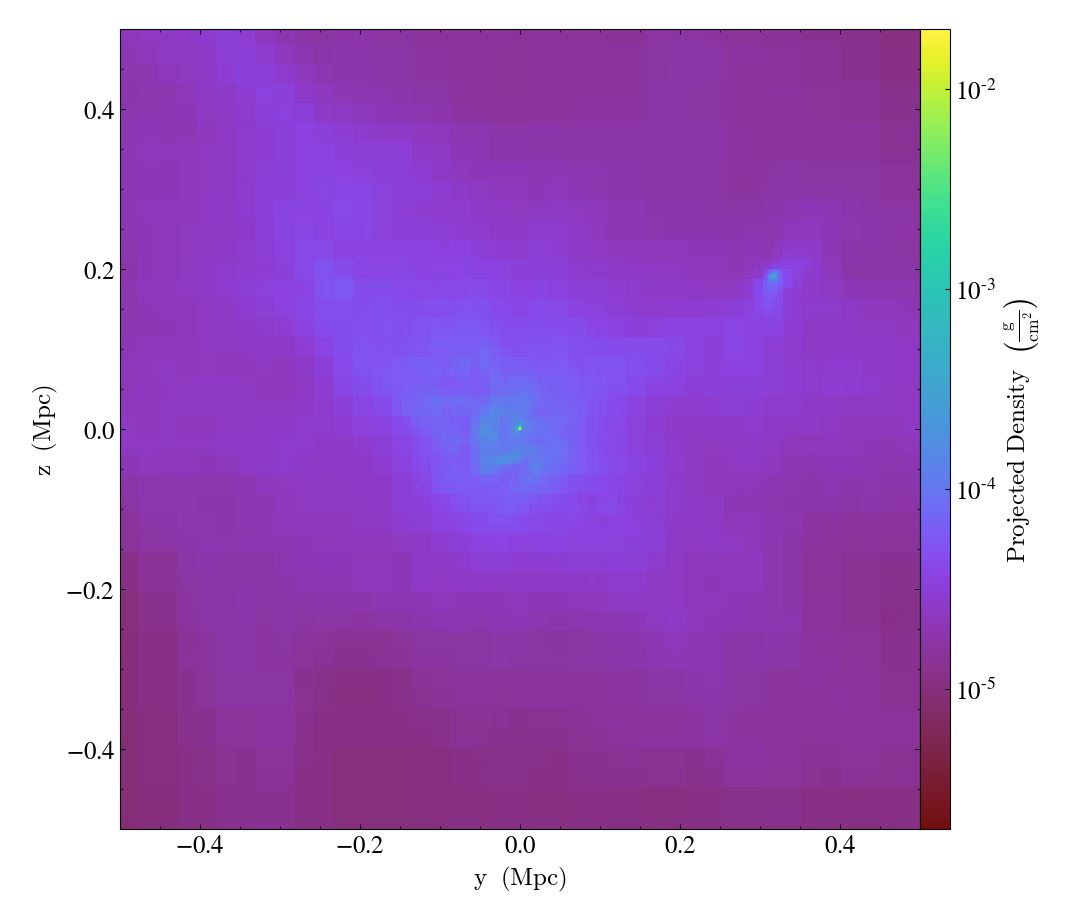

In [102]:
# ds = yt.load(fn)
# _, c = ds.find_max(('gas', 'density'))
# p = yt.ProjectionPlot(ds, 'x', ('gas', 'density'), center=c, width=(1, 'Mpc'))
# p.set_zlim(('gas', 'density'), 2e-6, 2e-2)
# p.show()


In [5]:
ray_start = ds.domain_left_edge
ray_end = ds.domain_right_edge

In [6]:
line_list = ['H', 'C', 'N', 'O', 'Mg']

In [7]:
# ray = trident.make_simple_ray(ds,
#                               start_position=ray_start,
#                               end_position=ray_end,
#                               data_filename="ray.h5",
#                               lines=line_list,
#                               ftype='gas')
ds = yt.load(fn)
ds.index
ad= ds.all_data()
px = yt.ProjectionPlot(ds, 'x', ('gas', 'density'))
px.show()

yt : [INFO     ] 2020-01-17 13:24:46,331 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2020-01-17 13:24:46,333 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-01-17 13:24:46,334 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-17 13:24:46,335 Parameters: domain_right_edge         = [8.47125 8.47125 8.47125]
yt : [INFO     ] 2020-01-17 13:24:46,336 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-01-17 13:24:46,338 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2020-01-17 13:24:46,338 Parameters: omega_lambda              = 0.693
yt : [INFO     ] 2020-01-17 13:24:46,340 Parameters: omega_matter              = 0.307
yt : [INFO     ] 2020-01-17 13:24:46,340 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-01-17 13:24:46,341 Parameters: hubble_constant           = 0.6777
yt : [INFO     ] 2020-01-17 13:24:46,389 Allocating for 1.329e+07 particle

KeyboardInterrupt: 

In [ ]:
new_box_size = ds.quan(0.5,'Mpc')

left_edge = center - new_box_size/2
right_edge = center + new_box_size/2

print (new_box_size.in_units('Mpc'))
print (left_edge.in_units('Mpc'))
print (right_edge.in_units('Mpc'))

In [150]:
ad2= ds.region(center=center, left_edge=left_edge, right_edge=right_edge)

yt : [INFO     ] 2019-10-06 20:05:49,867 Projection completed
yt : [INFO     ] 2019-10-06 20:05:49,868 xlim = 0.325506 0.664355
yt : [INFO     ] 2019-10-06 20:05:49,869 ylim = 6.892796 7.231646
yt : [INFO     ] 2019-10-06 20:05:49,871 xlim = 0.325506 0.664355
yt : [INFO     ] 2019-10-06 20:05:49,873 ylim = 6.892796 7.231646
yt : [INFO     ] 2019-10-06 20:05:49,876 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



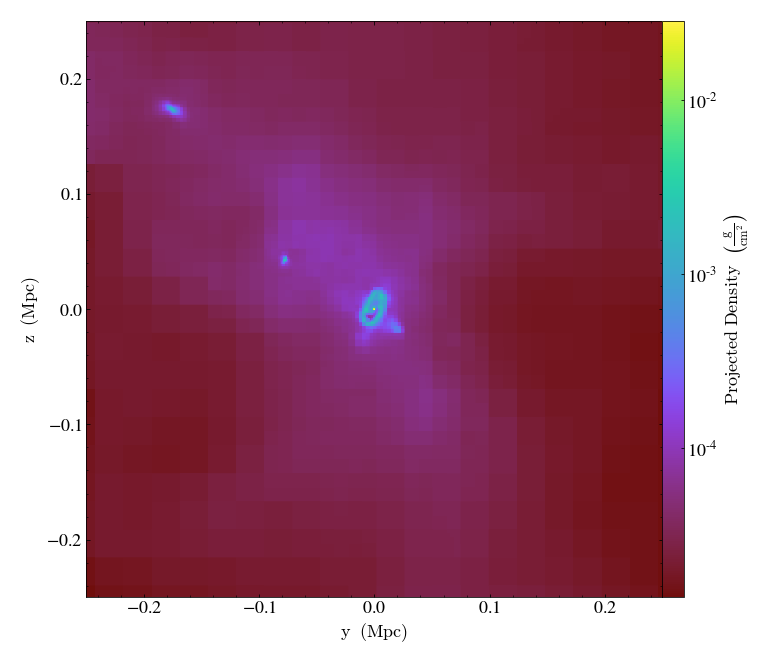

In [154]:
px = yt.ProjectionPlot(ds, 'x', ('gas', 'density'), center=center, width=new_box_size)
px.show()

In [7]:
sc = yt.create_scene(ds, lens_type='perspective')

# Get a reference to the VolumeSource associated with this scene
# It is the first source associated with the scene, so we can refer to it
# using index 0.
source = sc[0]

# Set the bounds of the transfer function
source.tfh.set_bounds((3e-31, 5e-27))

# set that the transfer function should be evaluated in log space
source.tfh.set_log(True)

# Make underdense regions appear opaque
source.tfh.grey_opacity = True

# Plot the transfer function, along with the CDF of the density field to
# see how the transfer function corresponds to structure in the CDF
source.tfh.plot('transfer_function.png', profile_field='density')

# save the image, flooring especially bright pixels for better contrast
sc.save('rendering.png', sigma_clip=6)

yt : [INFO     ] 2020-01-10 13:27:02,678 Setting default field to ('gas', 'density')


KeyboardInterrupt: 

In [189]:
len(ad['PartType0', 'Coordinates'])

6381559

In [192]:
pz = yt.ProjectionPlot(ds, 'x', ('gas', 'H_density'))

yt : [INFO     ] 2019-10-06 21:51:50,503 Projection completed
yt : [INFO     ] 2019-10-06 21:51:50,504 xlim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:51:50,504 ylim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:51:50,506 xlim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:51:50,507 ylim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:51:50,509 Making a fixed resolution buffer of (('gas', 'H_density')) 800 by 800



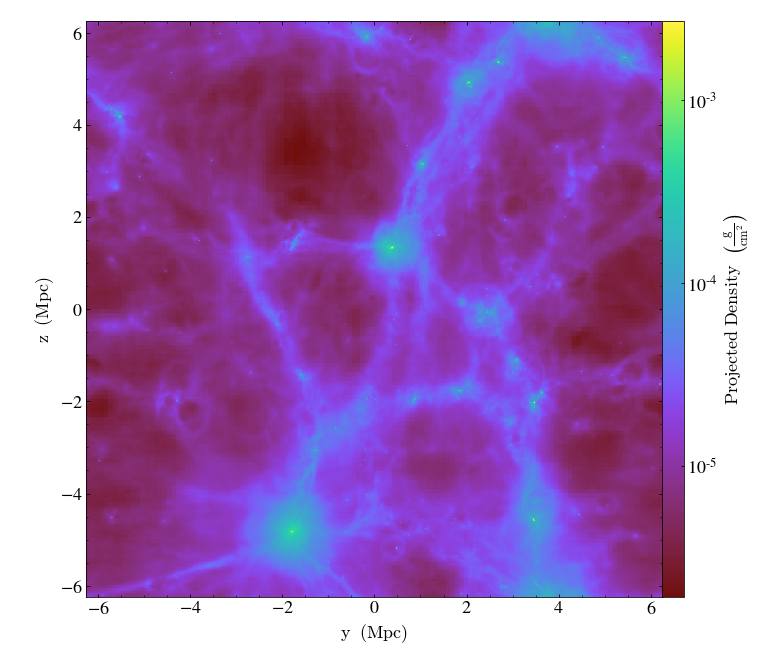


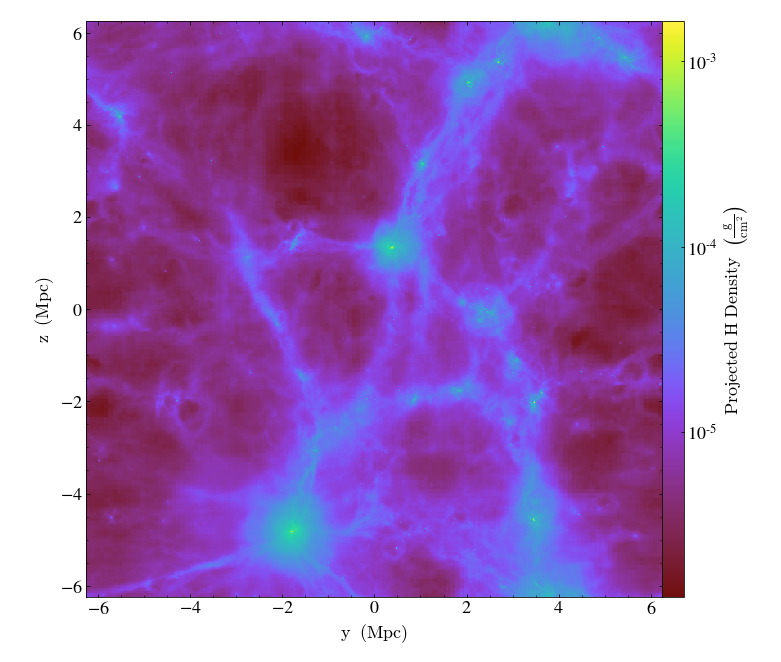

In [194]:
px.show()
pz.show()

In [171]:
p = yt.ProjectionPlot(ds, 'x', ('gas', 'density'))
p.annotate_ray(ray, arrow=True)
p.save('projection.png')

yt : [INFO     ] 2019-10-06 21:12:37,429 Projection completed
yt : [INFO     ] 2019-10-06 21:12:37,431 xlim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:12:37,431 ylim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:12:37,433 xlim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:12:37,433 ylim = 0.000000 8.471250
yt : [INFO     ] 2019-10-06 21:12:37,435 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-10-06 21:12:37,770 Saving plot projection.png


['projection.png']

In [8]:
ray = trident.make_simple_ray(ds, start_position=[0.2,-0.66,-0.66],
                               end_position=[0.2, 0.66, 0.66],
                               data_filename="ray.h5",
                               fields=[('gas', 'density'), ('gas', 'temperature'), ('gas', 'metallicity')])

yt : [INFO     ] 2020-01-17 13:25:05,510 Allocating for 1.329e+07 particles (index particle type 'all')
yt : [INFO     ] 2020-01-17 13:25:08,280 Identified 8.646e+05 octs
yt : [INFO     ] 2020-01-17 13:25:12,845 Getting segment at z = 2.220446049250313e-16: [ 0.02360927 -0.07791058 -0.07791058] unitary to [0.02360927 0.07791058 0.07791058] unitary.
/Users/DavidAbramov/yt/yt/units/yt_array.py:1400: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)
yt : [INFO     ] 2020-01-17 13:25:12,848 Getting subsegment: [0.023609266637155086 unitary, -0.07791057990261178 unitary, -0.07791057990261178 unitary] to [0.023609266637155086 unitary, 0.07791057990261178 unitary, 0.07791057990261178 unitary].
yt : [INFO     ] 2020-01-17 13:25:25,282 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2020-01-17 13:25:25,449 Parameters: current_time              = 4.361428036047735e+17 s
yt : [INFO     ] 2020-01-17 13:25:25,450 Parameters: domain_dimensions         = [2 2 2]


In [9]:
sg = trident.SpectrumGenerator('COS-G130M')
sg.make_spectrum(ray, lines=line_list)
sg.save_spectrum('spec_raw.txt')
sg.plot_spectrum('spec_raw.png')

yt : [INFO     ] 2020-01-17 13:25:25,466 Setting instrument to COS-G130M
yt : [INFO     ] 2020-01-17 13:25:25,495 Allocating for 1.000e+01 particles (index particle type 'all')
yt : [INFO     ] 2020-01-17 13:25:25,504 Identified 1.000e+00 octs
yt : [INFO     ] 2020-01-17 13:25:25,731 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:25,749 Creating C_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:25,849 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:25,903 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:25,957 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:26,011 Creating N_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2020-01-17 13:25:26,119 Creating N_p1_number_density

In [10]:
sg.add_qso_spectrum(emitting_redshift=0.5)
sg.add_milky_way_foreground()
sg.apply_lsf() #instumental profile
sg.add_gaussian_noise(30)

yt : [INFO     ] 2020-01-17 13:25:28,653 Applying default line spread function for COS-G130M.


In [23]:
sg.save_spectrum('spec_final.txt')
sg.plot_spectrum('spec_final.png')

yt : [INFO     ] 2020-01-10 13:35:27,778 Writing spectrum to ascii file: spec_final.txt.
yt : [INFO     ] 2020-01-10 13:35:28,340 Writing spectrum plot to png file: spec_final.png


In [24]:
ray = trident.make_onezone_ray(redshift=0.5)
sg = trident.SpectrumGenerator('COS-G160M')
sg.make_spectrum(ray)
sg.add_qso_spectrum(emitting_redshift=0.5)
sg.plot_spectrum('spec_qso_corrected.png')

yt : [INFO     ] 2020-01-18 22:06:05,479 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2020-01-18 22:06:05,623 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-01-18 22:06:05,624 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-01-18 22:06:05,625 Parameters: domain_left_edge          = [0. 0. 0.] kpc
yt : [INFO     ] 2020-01-18 22:06:05,626 Parameters: domain_right_edge         = [10. 10. 10.] kpc
yt : [INFO     ] 2020-01-18 22:06:05,627 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-18 22:06:05,631 Setting instrument to COS-G160M
yt : [INFO     ] 2020-01-18 22:06:05,668 Using all 213 available lines in 'lines.txt'.
yt : [INFO     ] 2020-01-18 22:06:05,673 Allocating for 1.000e+00 particles (index particle type 'all')
yt : [INFO     ] 2020-01-18 22:06:05,681 Identified 1.000e+00 octs
yt : [INFO     ] 2020-01-18 22:06:05,952 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 202

In [179]:
trident.add_ion_fields(ds, ions=['O VI'], ftype="gas")

ValueError: ('gas', 'smoothing_length') not in derived_field_list

In [23]:
print(sg)

<SpectrumGenerator>:
    lambda_field: [1150.   1150.01 1150.02 ... 1449.98 1449.99 1450.  ] angstrom
    tau_field: [0. 0. 0. ... 0. 0. 0.]
    flux_field: [0.63735482 0.78807175 0.81646502 ... 0.81528536 0.73399495 0.65062186]
<Instrument>:
    name: COS-G130M
    lambda_min: 1150.0 angstrom
    lambda_max: 1450.0 angstrom
    n_lambda: 30001.0 dimensionless
    dlambda: 0.01 angstrom
    lsf_kernel: avg_COS_G130M.txt

